# 8 Tscherenkow-Strahlung in der Atmosphäre

Der Brechungsindex $n$ der Atmosphare ist wie die Dichte Abhängig von der Höhe. $n$ kann näherungsweise für eine isotherme Atmosphäre durch

$$n(h) = 1 + 2.9 \cdot 10^{-4}\,e^{-\frac{h}{h_s}}$$

mit einer Skalenhöhe von $ h_s = 6220\,\text{m} $ beschrieben werden. Ein senkrecht in die Atmosphare einfallendes relativistisches Teilchen emittiere entlang seiner Trajektorie Tscherenkow-Strahlung.

#### (a) Zeigen Sie, dass auf Höhe des Meeresspiegels ( $h = 0$ ) das abgestrahle Tscherenkow-Licht innerhalb eines Radius von etwa $r \approx 100$ m niedergeht.

setze zunächst $\beta\to1$. Dann ergibt sich mit $\cos\theta = \frac{1}{n}$ folgendermaßen:

$$
r(h) = h\cdot\tan\theta = h\cdot\tan(\arccos\frac{1}{n})
$$

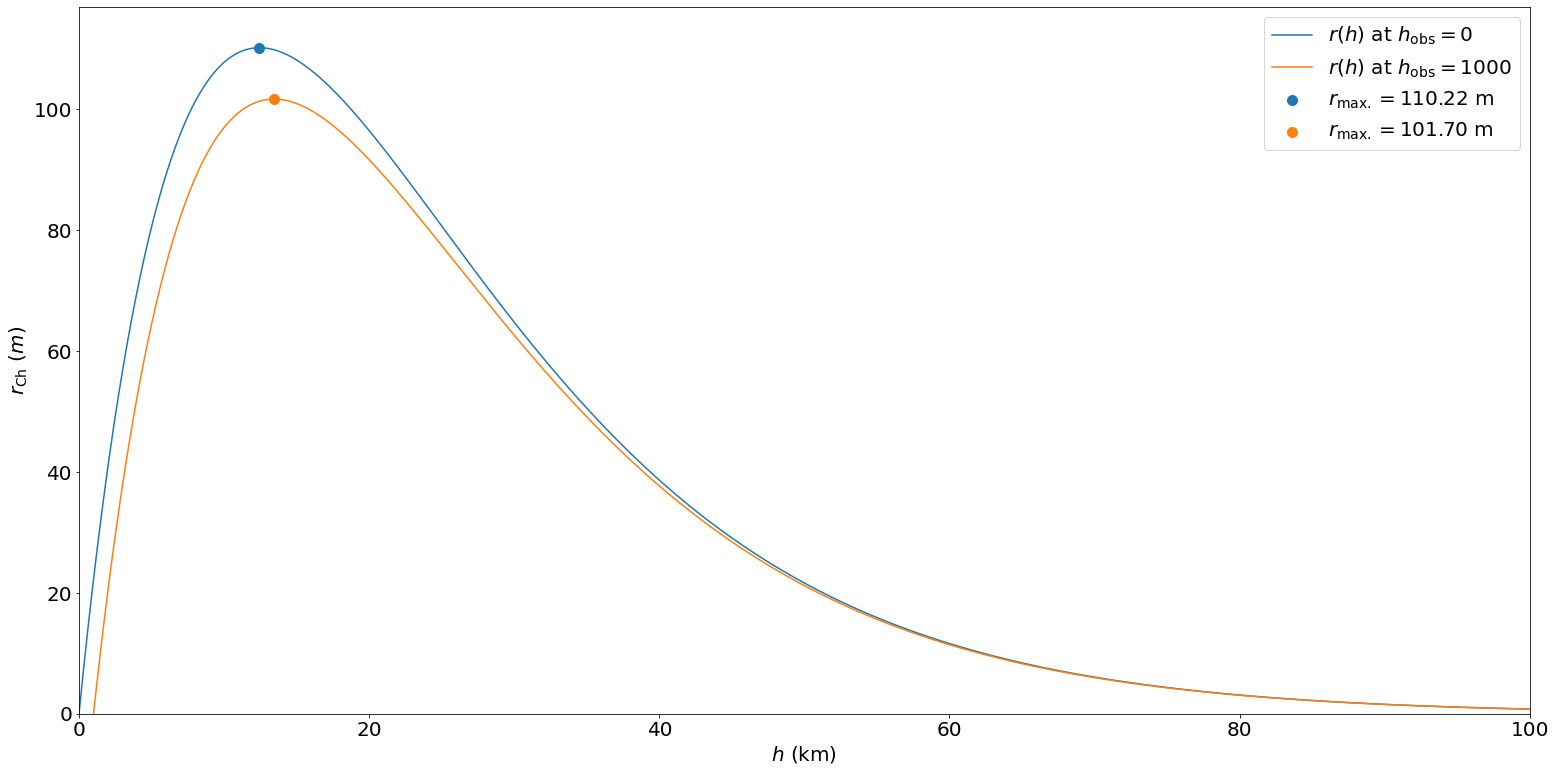

Maximaler Cherenkov-Radius bei h = 12.44 km für h_obs = 0 m
Maximaler Cherenkov-Radius bei h = 13.44 km für h_obs = 1000 m


In [2]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [26, 13]
plt.rcParams.update({'font.size': 20})

def CR_radius(h,h0=0):
    
    n = 1 + 2.9e-4 * np.exp(-h/6.220)
    
    # Had this at first via tayloring the angle, see below for exact result
    # return (h-h0) * np.sqrt(2*(1-1/n))
    
    return (h - h0) * np.tan(np.arccos(1/n))

X = np.linspace(0,100,10000)
Y1 = CR_radius(X)
Y2 = CR_radius(X,1)

plt.scatter(X[np.argmax(Y1)],max(Y1)*1e3,s=100,label=r"$r_\mathrm{max.}=$"+f"{max(Y1)*1e3:.2f} m")
plt.scatter(X[np.argmax(Y2)],max(Y2)*1e3,s=100,label=r"$r_\mathrm{max.}=$"+f"{max(Y2)*1e3:.2f} m")
plt.ylabel(r"$r_\mathrm{Ch}$ ($m$)")
plt.plot(X,Y1*1e3,label=r"$r(h)$ at $h_\mathrm{obs}=0$")
plt.plot(X,Y2*1e3,label=r"$r(h)$ at $h_\mathrm{obs}=1000$")
plt.xlabel(r"$h$ (km)")
plt.xlim(0,100)
plt.ylim(0)
plt.legend()
plt.show()

print(f"Maximaler Cherenkov-Radius bei h = {X[np.argmax(Y1)]:.2f} km für h_obs = 0 m")
print(f"Maximaler Cherenkov-Radius bei h = {X[np.argmax(Y2)]:.2f} km für h_obs = 1000 m")

# 9 Kritische Energie

Ein ultra-hochenergetisches Teilchen dringe in die Atmosphare ein und erzeuge dabei einen extensiven Luftschauer von Sekundarteilchen. Die Zahl geladener Teilchen erreiche einen Maximalwert von

$$
n_\mathrm{max,ch} = 5 · 10^8.
$$

#### (a) Bestimmen Sie die Energie $E_\mathrm{prim}$ des Primärteilchens

##### Annahme: Primärteilchen hat hadronische sowie elektromagnetische Komponente, die sich wie folgt modellieren lassen:

* Pro hadronische Interaktionslänge werden pro Teilchen $N$ Pionen (+,-,0) erzeugt. Energie gleichverteilt auf Partikeln.
* $\frac{2}{3}N$ Pionen geladen $\rightarrow$ führen hadronische Komponente weiter.
* $\frac{1}{3}N$ Pionen ungeladen. Zerfallen zu 2 $\gamma$ $\rightarrow$ el. Komponente
* Elektrischer Schauer wird nach dem Heitler-Modell beschrieben.

$$ N_\mathrm{had.} = N^n, \qquad E_\mathrm{particle} = \frac{E_0}{N^n}, \qquad E_\mathrm{el} = \frac{1}{3}E_\mathrm{particle}$$

$$
\begin{aligned}
N_\mathrm{ch} &= N_\mathrm{ch}^\mathrm{had} + N_\mathrm{ch}^\mathrm{el} \\[10pt]
\Longleftrightarrow N_\mathrm{ch}(n) &= (\,\frac{2}{3}\,N\,)^n + \sum\limits_{k=1}^{n} N_\mathrm{Shower}\,\cdot\,N_{e^+e^-} \\
\Longleftrightarrow N_\mathrm{ch}(n) &= (\,\frac{2}{3}\,N\,)^n + \sum\limits_{k=1}^{n} N_\mathrm{Shower}\,\cdot\,\frac{2}{3}\,N_\mathrm{Heitler} \\
\Longleftrightarrow N_\mathrm{ch}(n) &= (\,\frac{2}{3}\,N\,)^n + \sum\limits_{k=1}^{n} N_\mathrm{Shower}\,\cdot\,\frac{2}{3}\frac{\frac{1}{2}E_\mathrm{particle}}{E_\mathrm{c,el}} \\
\Longleftrightarrow N_\mathrm{ch}(n) &= (\,\frac{2}{3}\,N\,)^n + \sum\limits_{k=1}^{n} 2\cdot\frac{1}{3}\;(\,\frac{2}{3}\,N\,)^k \cdot\frac{2}{3}\frac{1}{2N^k}\frac{E_0}{E_\mathrm{c,el}}\\
\Longleftrightarrow N_\mathrm{ch}(n) &= (\,\frac{2}{3}\,N\,)^n + \sum\limits_{k=1}^{n} \frac{2^{k+1}}{3^{k+2}}\;\frac{E_0}{E_\mathrm{c,el}}
\end{aligned}
$$

$$ \mathrm{wobei}\;n_\mathrm{max}\;\mathrm{gegeben\;ist\;durch}\;n_\mathrm{max} = \log \frac{E_0}{E_\mathrm{c,had}}\cdot\frac{1}{\log N} $$

In [4]:
def N_ch(n,E0,N,E_c_el=87.92e6):
    # calculate number of charged particles after n steps
    # E0 = primary energy of the first particle / in eV
    # N = Multiplicity, i.e. create N pions per step
    # E_c_el = critical electromagnetic energy / in eV
    
    N_ch_had, E_ch_had = (2/3*N)**n, (2/3*N)**n * E0/N**n
    n_vals = 1 + np.array(range(int(n)))
    N_ch_el, E_ch_el = 0, 0

    for n_temp1 in n_vals:
        N_ch_el += 2**(n_temp1+1)/3**(n_temp1+2) * E0/E_c_el
        E_ch_el += 2/3 * (2/3*N)**n_temp1/2 * E0/N**n_temp1
    
    N_ch = N_ch_had + N_ch_el
    E_ch = E_ch_had + E_ch_el
    
    print(f"Charged particle after {int(n)} steps for primary energy {E0} eV:")
    print(f"\n{int(N_ch_had):.2e} pi+- plus {int(N_ch_el):.2e} e+- = {N_ch:.1e} total")
    
    print(f"\nRatio of energy contained in charged particles: {E_ch/E0:.2f}")
    
# Let's calculate this for some values I found sensible

E_c_had = 10e9    # critical pion energy in air in eV, adopted from http://particle.astro.ru.nl/ps/astropart1415-wk7a.pdf
N = 15            # total multiplicity of hadronic shower (including pi+- AND pi0 !), also adopted from http://particle.astro.ru.nl/ps/astropart1415-wk7a.pdf
E0 = 1.13888e17   # primary energy of the shower given in eV, choosen such that N_tot roughly equals 5e8

n_max = np.floor(np.log(E0/E_c_had)/np.log(N))
N_ch(n_max,E0,N)

Charged particle after 5 steps for primary energy 1.13888e+17 eV:

1.00e+05 pi+- plus 5.00e+08 e+- = 5.0e+08 total

Ratio of energy contained in charged particles: 0.71




Setze $N=15$ sowie die kritischen Energien zu $E_\mathrm{c,el}=87.92\,\mathrm{MeV}$ bzw. $E_\mathrm{c,had}=10\,\mathrm{GeV}$

Primärenergie mit bester Übereinstimmung zu $n=5\cdot10^8$ Teilchen: $\;E_0 = 1.13888\times10^{17}\,\mathrm{eV}$

$\textbf{Aber!}: \frac{5\times10^8\;\cdot\;1.6\times10^9\,\mathrm{eV}}{1.13888\times10^{17}\,\mathrm{eV}} \approx 7 \neq 1$ weiß nicht, was das genau soll =/

#### (b) Wie hoch ist der Anteil der Energie $E_\mathrm{prim}$, der noch in den geladenen Teilchen enthalten ist?

Gesamtenergie setzt sich zusammen aus der Energie der $\pi^\pm$ und den Eletronen/Positronen des EM-Schauers. Hierzu habe ich mir folgendes Überlegt:

$$
E_\mathrm{ch}^\mathrm{had}(n) = N_\mathrm{ch}^\mathrm{had}\,\frac{E_0}{N^n}, \qquad E_\mathrm{ch}^\mathrm{el}(n) = \sum\limits_{k=1}^{n}\;\;\frac{2}{3}\;\frac{N_\mathrm{ch}^\mathrm{had}}{2}\;\frac{E_0}{N^n}
$$

* Ungefähr $71\%$ (siehe Output Skript in Zelle 6) $\rightarrow$ meiste Energie steckt in EM-Schauer
* sollte for $E_0\to\infty$ ($n_\mathrm{max}\to\infty$) gegen $\frac{2}{3}=66\%$ streben.

#### (c) Wohin verschwand die restliche Energie? Welche bedeutung hat der Wert 1.6 GeV aus Eq. (2)?

Energie steckt in ungeladenen Teilchen. Vielleicht auch in ein wenig Ionisationsenergie und so weiter.

Sind die 1.6 eV die kritische Energie des EM-Schauers? Das würde physikalisch Sinn ergeben, ich habe allerdings in den PDG tables andere Werte gefunden.

# 10 Dunkle Materie in Luftschauern

Betrachten Sie den Fall, dass ab einer gewissen Energie pro Wechselwirkung, $E_\mathrm{crit} = m_Λ$, ein neues Teilchen, $Λ$, erzeugt wird, welches weder zur weiteren Schauerentwicklung beitragt noch experimentell nachweisbar ist. Nehmen Sie an, dass der Anteil $α$ der Energie in den gewöhnlichen und detektierbaren Schauerkomponenten verbliebe und dass bei jeder Wechselwirkung oberhalb der kritischen Energie(-dichte) ein Anteil $1 − α$ zur Erzeugung der $Λ$-Teilchen beitragt.

#### (a) Wieviel Energie geht an den unsichtbaren Λ-Kanal nach n Wechselwirkung verloren?

Energieanteil des sichtbaren Schauers nach $n$ steps: $ \frac{E_\mathrm{vis}(n)}{E_0} = \alpha^n $

Energieanteil des unsichtbaren Anteils nach $n$ steps: $\frac{E_\Lambda(n)}{E_0} = 1 - \frac{E_\mathrm{vis}(n)}{E_0} = 1-\alpha^n$

#### (b) Berechnen sie die Anzahl an möglichen Wechselwirkungen, in denen $Λ$-Teilchen erzeugt werden. Erklären Sie das Verhalten des Graphs.

Schauer setzt sich fort bis $E^{(1)}_\text{vis}(n_\text{max}) = \frac{\alpha^{n_\text{max}} E_0}{N^{n_\text{max}}} = E_c$. Daraus folgt:

$$ n_\text{max} = \lfloor\;\left(\alpha\,\frac{E_c}{E_0}\right)^{-\log\frac{\alpha}{N}}\;\rfloor$$

\textbf{Erklärung zum Verhalten des Graphen:} Zunächst Anteil des sichtbaren Schaueranteils konstant bei 1. Dann bei $E_0 = m_\Lambda$ 

wird der Übergang in den dunklen Kanal erstmals kinematisch möglich für $n=1$ (aber unmöglich für alle weiteren Schritte).

Mit steigender Primärenergie dann sukszessive immer mehr Schritte am dunklen Kanal beteiligt $\rightarrow$ Anteil an sichtbarer Energie sinkt schrittweise ab.

#### (c) Wie äußert sich dieser Effekt im Spektrum der kosmischen Strahlung an der Stelle $E = m_{Λ}$?

Spektrum der kosmischen Strahling lässt sich mit einem Power-Law gut beschreiben. 

An der Stelle  $E = m_{Λ}$ müsste dieses Power-Law dann einen Knick haben, oder?